### Importing Dataset form Kaggle

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("princekhunt19/road-detection-imgs-and-labels")

print("Path to dataset files:", path)

100%|██████████| 252M/252M [00:03<00:00, 68.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/princekhunt19/road-detection-imgs-and-labels/versions/1


### Installing Ultralytics

In [4]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 902.2/902.2 kB 26.9 MB/s eta 0:00:00


### Importing Required Libraries

In [7]:
from ultralytics import YOLO
import os
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import torch
from pathlib import Path
from matplotlib import pyplot as plt
import matplotlib.patches as patches

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


### Initializing Model

In [8]:
model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 132MB/s]


### Extracting Images and Labels from Training Datasets

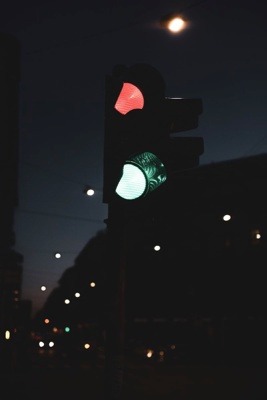

In [9]:
train_image_path = os.path.join(path, 'dataset', 'train', 'images')
label_path = os.path.join(path, 'dataset', 'train', 'labels')
image_files = sorted(os.listdir(train_image_path))
label_files = sorted(os.listdir(label_path))
image_path = os.path.join(train_image_path, image_files[0])
label = os.path.join(label_path, label_files[0])
image = cv2.imread(image_path)
cv2_imshow(image)

In [10]:
with open(label, 'r') as file:
  content = file.read()
  print(content)

0 0.5730337078651685 0.3675 0.41198501872659177 0.425



## Training The Model

In [11]:
yaml_path = os.path.join(path, 'dataset', 'dataset.yaml')

model.train(data = yaml_path, epochs = 10, imgsz = (640, 640))

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/root/.cache/kagglehub/datasets/princekhunt19/road-detection-imgs-and-labels/versions/1/dataset/dataset.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=(640, 640), save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt

100%|██████████| 755k/755k [00:00<00:00, 19.9MB/s]


Overriding model.yaml nc=80 with nc=9

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /root/.cache/kagglehub/datasets/princekhunt19/road-detection-imgs-and-labels/versions/1/dataset/train/labels... 1263 images, 5 backgrounds, 0 corrupt: 100%|██████████| 1263/1263 [00:01<00:00, 1071.47it/s]


train: New cache created: /root/.cache/kagglehub/datasets/princekhunt19/road-detection-imgs-and-labels/versions/1/dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.23 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /root/.cache/kagglehub/datasets/princekhunt19/road-detection-imgs-and-labels/versions/1/dataset/val/labels... 158 images, 0 backgrounds, 0 corrupt: 100%|██████████| 158/158 [00:00<00:00, 1128.16it/s]

val: New cache created: /root/.cache/kagglehub/datasets/princekhunt19/road-detection-imgs-and-labels/versions/1/dataset/val/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000769, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      1.467      2.696      1.192         39        640: 100%|██████████| 79/79 [17:13<00:00, 13.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:45<00:00,  9.10s/it]

                   all        158        794      0.947      0.312      0.612      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      1.417      1.684      1.162        103        640: 100%|██████████| 79/79 [16:59<00:00, 12.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:46<00:00,  9.28s/it]

                   all        158        794       0.75      0.605      0.644      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      1.398      1.487      1.165         58        640: 100%|██████████| 79/79 [16:56<00:00, 12.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:42<00:00,  8.47s/it]

                   all        158        794      0.674      0.638       0.64      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      1.391      1.393      1.173         67        640: 100%|██████████| 79/79 [16:58<00:00, 12.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:43<00:00,  8.73s/it]

                   all        158        794      0.624      0.631      0.681       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      1.355      1.306      1.148         72        640: 100%|██████████| 79/79 [16:52<00:00, 12.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:41<00:00,  8.34s/it]

                   all        158        794       0.79      0.673       0.71      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      1.325      1.212       1.13         53        640: 100%|██████████| 79/79 [16:55<00:00, 12.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:41<00:00,  8.29s/it]

                   all        158        794      0.807      0.723      0.747      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      1.318      1.143      1.127         96        640: 100%|██████████| 79/79 [16:55<00:00, 12.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:41<00:00,  8.27s/it]

                   all        158        794      0.717      0.709      0.747       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G      1.287      1.085      1.107         47        640: 100%|██████████| 79/79 [17:00<00:00, 12.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:40<00:00,  8.13s/it]

                   all        158        794       0.86      0.725      0.772      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G      1.263       1.04      1.107         89        640: 100%|██████████| 79/79 [17:03<00:00, 12.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:42<00:00,  8.41s/it]

                   all        158        794      0.869       0.74      0.772      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G       1.24      1.001      1.097         69        640: 100%|██████████| 79/79 [16:59<00:00, 12.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:43<00:00,  8.61s/it]

                   all        158        794      0.761      0.771      0.791      0.582



10 epochs completed in 2.956 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,007,403 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:38<00:00,  7.76s/it]


                   all        158        794      0.761      0.772      0.785      0.577
   Trafic Light Signal          8         16      0.611       0.75      0.758      0.508
           Stop Signal          8          8      0.801          1      0.954      0.862
     Speedlimit Signal         67         71      0.986          1      0.995      0.882
      Crosswalk Signal         17         21       0.89      0.775      0.829      0.646
             Crosswalk         17         18       0.94      0.866      0.876      0.654
            Pedestrian         10         29      0.801      0.897      0.861      0.593
                   Bus          8          9      0.227      0.111      0.136     0.0977
                   Car         45        407      0.824      0.739      0.812      0.442
                 Truck         43        215      0.767      0.809      0.844      0.504
Speed: 6.9ms preprocess, 218.8ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/dete

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79b7076ce1a0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0470

### Function to Resize and Normalize the Image

In [12]:
# Load class names
class_names = ["Traffic Light Signal", "Stop Signal", "Speedlimit Signal", "Crosswalk Signal", "Crosswalk", "Pedestrian", "Bus", "Car", "Truck"]

def preprocess_image(image_path, target_size=(640, 640)):
    """
    Preprocess image for YOLO model: resize and normalize
    """
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

    # Resize image to the target size (640x640)
    image_resized = cv2.resize(image, target_size)

    # Normalize the image (divide by 255 to scale the values between 0 and 1)
    image_normalized = image_resized / 255.0

    # Convert the image to a format suitable for the model (add batch dimension)
    image_input = np.expand_dims(image_normalized, axis=0)

    # Convert to tensor
    image_tensor = torch.tensor(image_input).float()

    # Change the shape from (1, 640, 640, 3) to (1, 3, 640, 640)
    image_input = torch.tensor(image_input).permute(0, 3, 1, 2).float()

    return image_input, image_resized

### Predicting and Displaying The Image

In [13]:
def predict_and_display(model, image_path, class_names):
    """
    Predict bounding boxes and display the image with annotations
    """
    # Preprocess image
    image_tensor, image_resized = preprocess_image(image_path)

    # Make prediction
    with torch.no_grad():
        model.eval()  # Set model to evaluation mode
        results = model(image_tensor)  # Results will be a list of Results objects

    # Extract predictions from the Results object
    result = results[0]  # Access the first (and only) item in the list of results

    # Get the bounding boxes, labels, and scores
    boxes = result.boxes.xywh.cpu().numpy()  # Get bounding box coordinates in [x, y, w, h]
    labels = result.boxes.cls.cpu().numpy()  # Get class labels
    scores = result.boxes.conf.cpu().numpy()  # Get confidence scores

    # Filter predictions with score > 0.5
    threshold = 0.5
    filtered_boxes = boxes[scores > threshold]
    filtered_labels = labels[scores > threshold]

    # Display the image with bounding boxes
    fig, ax = plt.subplots(1, figsize=(12, 9))
    ax.imshow(image_resized)

    # Loop through filtered predictions and draw bounding boxes and class labels
    for i in range(filtered_boxes.shape[0]):
        x, y, w, h = filtered_boxes[i]
        x1, y1 = int(x - w / 2), int(y - h / 2)
        x2, y2 = int(x + w / 2), int(y + h / 2)

        # Draw the bounding box
        rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

        # Add class label
        label = class_names[int(filtered_labels[i])]
        ax.text(x1, y1 - 10, label, color='yellow', fontsize=12, weight='bold')

    # Show the image
    plt.axis('off')
    plt.show()

### Testing


0: 640x640 2 Trafic Light Signals, 1 Stop Signal, 1 Crosswalk Signal, 242.2ms
Speed: 2.2ms preprocess, 242.2ms inference, 12.5ms postprocess per image at shape (1, 3, 640, 640)


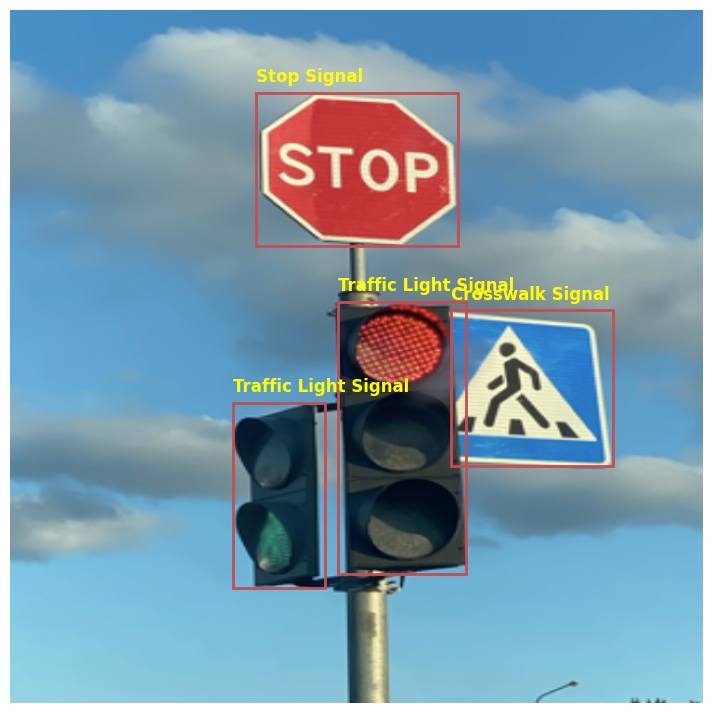

In [14]:
# Set your test image path
test_image_path = os.path.join(path, 'dataset', 'test', 'images')
image_files = sorted(os.listdir(test_image_path))

# Predict and display for each image in the test set

image_path = os.path.join(test_image_path, image_files[150])
predict_and_display(model, image_path, class_names)

### Evaluation

In [19]:
metrics = model.val(data=yaml_path)
metrics

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)


val: Scanning /root/.cache/kagglehub/datasets/princekhunt19/road-detection-imgs-and-labels/versions/1/dataset/val/labels.cache... 158 images, 0 backgrounds, 0 corrupt: 100%|██████████| 158/158 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:42<00:00,  4.28s/it]


                   all        158        794      0.775      0.768      0.788      0.576
   Trafic Light Signal          8         16      0.613       0.75      0.759      0.509
           Stop Signal          8          8      0.802          1      0.954      0.856
     Speedlimit Signal         67         71      0.986          1      0.995      0.885
      Crosswalk Signal         17         21      0.899      0.762      0.834      0.645
             Crosswalk         17         18       0.94      0.864      0.876      0.654
            Pedestrian         10         29      0.815       0.91      0.883      0.588
                   Bus          8          9      0.301      0.111      0.145      0.105
                   Car         45        407      0.835      0.722       0.81       0.44
                 Truck         43        215      0.782      0.791      0.841      0.502
Speed: 3.5ms preprocess, 244.7ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/dete

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79b6ff5d01f0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0470

The evaluation metrics indicate the model's overall performance across 158 images and 794 instances, achieving a precision (P) of 77.5%, recall (R) of 76.8%, mAP@50 of 78.8%, and mAP@50-95 of 57.6%. Among the classes, the "Speedlimit Signal" shows the highest performance with near-perfect precision and recall (98.6% and 100%, respectively) and an mAP@50-95 of 88.5%. Other classes like "Stop Signal," "Crosswalk Signal," and "Pedestrian" also demonstrate strong performance. However, the model struggles with "Bus," exhibiting low precision (30.1%), recall (11.1%), and mAP scores. Similarly, the "Car" and "Truck" classes have moderate performance, with room for improvement in mAP@50-95. These results suggest the model is effective for most classes but requires fine-tuning for underperforming categories like "Bus."